In [1]:
# Görseldeki bilgileri dijital bir tabloya dönüştürelim
import pandas as pd

# Görseldeki verilerden oluşturulan tablo
data = {
    "Parametre": ["RR", "FA", "GR", "Crr", "GVW", "q yer çekimi ivmesi", "tet", "sintet", "m", "a", "Rf", "r wheel", "TTE", "Tork", "Tork(max)", "fraction", "statik friction"],
    "Değer": [17.658, 291.667, 102.647, 0.012, 1471.5, 9.81, 4, 0.06976, 150, 1.94444, 0.2, 0.2, 411.971, 16.4789, 61.803, 0.6, 0.7],
    "Birim": ["N", "N", "N", "boyutsuz", "N", "m/s2", "derece", None, "kg", "m/s2", "average", "m", "N", "Nm", "Nm", None, None]
}

# Verileri pandas DataFrame'e dönüştürelim
tork_df = pd.DataFrame(data)

# Tabloyu görüntüleyelim
tork_df


,Parametre,Değer,Birim
0,RR,17.65800,N
1,FA,291.66700,N
2,GR,102.64700,N
3,Crr,0.01200,boyutsuz
4,GVW,1471.50000,N
5,q yer çekimi ivmesi,9.81000,m/s2
6,tet,4.00000,derece
7,sintet,0.06976,None
8,m,150.00000,kg
9,a,1.94444,m/s2


In [3]:
# Gerekli parametreleri al
m = df.loc[df['Parametre'] == 'm (kütle)', 'Değer'].values[0]
a = df.loc[df['Parametre'] == 'a (ivme)', 'Değer'].values[0]
r = df.loc[df['Parametre'] == 'r wheel (tekerlek yarıçapı)', 'Değer'].values[0]

# Tork hesaplama
tork = m * a * r
print(f"Hesaplanan Tork: {tork} Nm")


Hesaplanan Tork: 58.333200000000005 Nm


In [4]:
import numpy as np

# Parametreler için aralık belirleme
mass_range = np.linspace(100, 200, 10)  # 100 kg ile 200 kg arasında 10 farklı değer
radius_range = np.linspace(0.1, 0.3, 10)  # 0.1 m ile 0.3 m arasında
accel_range = np.linspace(1.0, 3.0, 10)  # 1 m/s² ile 3 m/s² arasında

# Kombinasyonları deneme
results = []
for m in mass_range:
    for r in radius_range:
        for a in accel_range:
            tork = m * a * r
            results.append((m, a, r, tork))

# Sonuçları DataFrame'e dönüştürme
result_df = pd.DataFrame(results, columns=['Kütle (kg)', 'İvme (m/s²)', 'Yarıçap (m)', 'Tork (Nm)'])
print(result_df)


     Kütle (kg)  İvme (m/s²)  Yarıçap (m)   Tork (Nm)
0         100.0     1.000000          0.1   10.000000
1         100.0     1.222222          0.1   12.222222
2         100.0     1.444444          0.1   14.444444
3         100.0     1.666667          0.1   16.666667
4         100.0     1.888889          0.1   18.888889
..          ...          ...          ...         ...
995       200.0     2.111111          0.3  126.666667
996       200.0     2.333333          0.3  140.000000
997       200.0     2.555556          0.3  153.333333
998       200.0     2.777778          0.3  166.666667
999       200.0     3.000000          0.3  180.000000

[1000 rows x 4 columns]


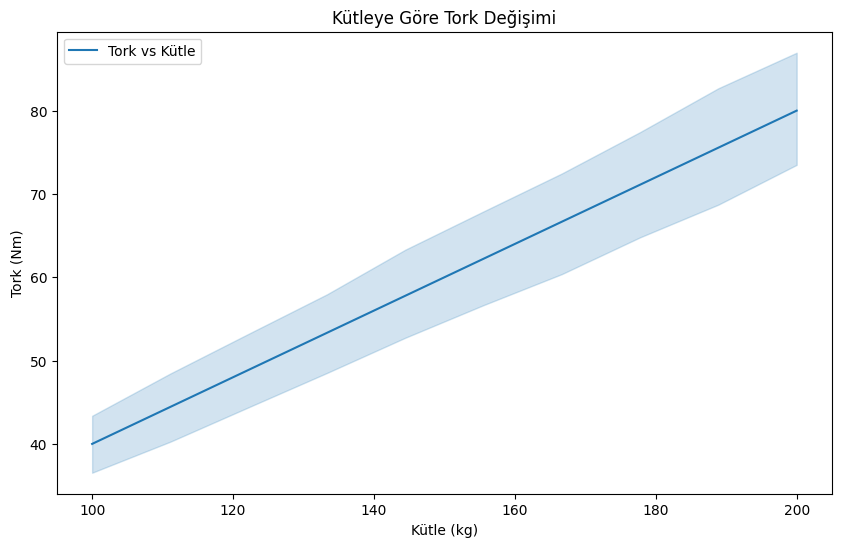

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tork ile kütle arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_df, x='Kütle (kg)', y='Tork (Nm)', label='Tork vs Kütle')
plt.title('Kütleye Göre Tork Değişimi')
plt.xlabel('Kütle (kg)')
plt.ylabel('Tork (Nm)')
plt.legend()
plt.show()


In [6]:
from scipy.optimize import minimize

# Amaç fonksiyonu (negatif tork, çünkü maksimum tork istiyoruz)
def objective(params):
    m, a, r = params
    return -(m * a * r)  # Negatif tork (maksimum için)

# Kısıtlar: 0.1 ≤ r ≤ 0.3, 100 ≤ m ≤ 200, 1 ≤ a ≤ 3
bounds = [(100, 200), (1, 3), (0.1, 0.3)]
initial_guess = [150, 1.94444, 0.2]  # Başlangıç değerleri

# Optimizasyonu çalıştır
result = minimize(objective, initial_guess, bounds=bounds)
optimal_params = result.x
optimal_tork = -result.fun

print(f"Optimum Parametreler: Kütle={optimal_params[0]:.2f}, İvme={optimal_params[1]:.2f}, Yarıçap={optimal_params[2]:.2f}")
print(f"Optimum Tork: {optimal_tork:.2f} Nm")


Optimum Parametreler: Kütle=200.00, İvme=3.00, Yarıçap=0.30
Optimum Tork: 180.00 Nm


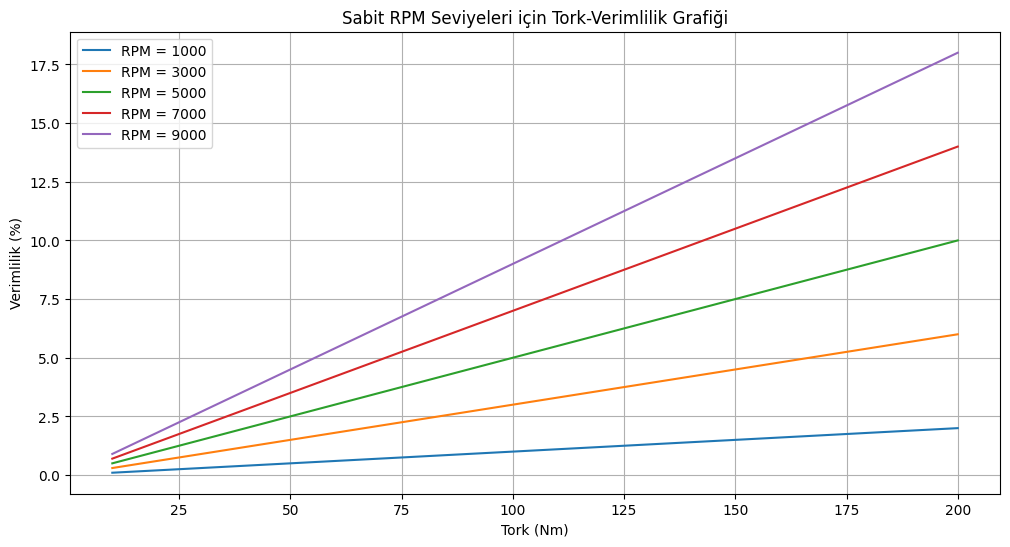

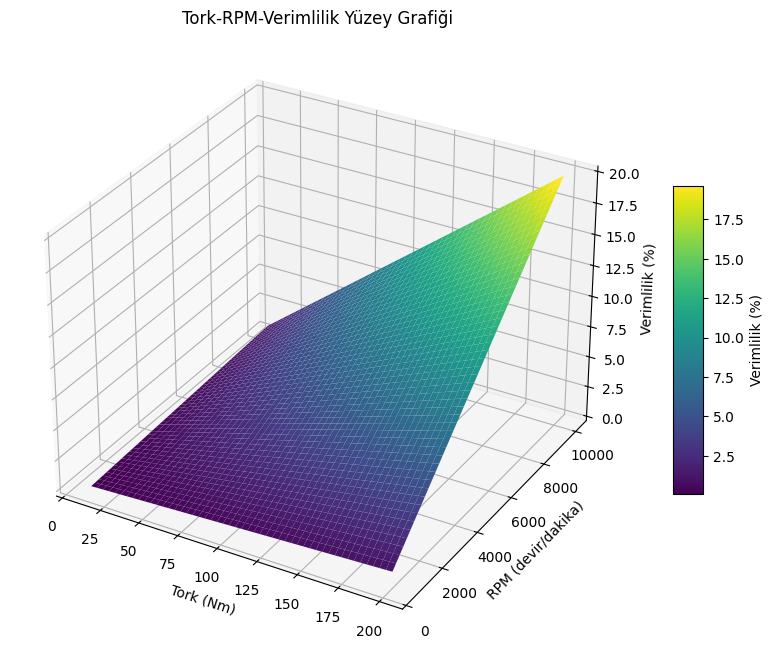

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sabit parametreler
k = 100000  # Ölçekleme katsayısı

# Tork ve RPM değerlerini tanımlama
torque = np.linspace(10, 200, 50)  # 10 Nm'den 200 Nm'ye, 50 adımda
rpm = np.linspace(500, 10000, 50)  # 500'den 10,000 RPM'ye, 50 adımda

# Verimlilik matrisini hesaplama
T, RPM = np.meshgrid(torque, rpm)  # Tork ve RPM için ızgara oluşturma
eta = (T * RPM) / k  # Verimlilik hesaplama

# --- 2D Grafikleri Çizim ---
plt.figure(figsize=(12, 6))

# Sabit RPM seviyeleri için Tork-Verimlilik grafikleri
for fixed_rpm in [1000, 3000, 5000, 7000, 9000]:
    efficiency = (torque * fixed_rpm) / k
    plt.plot(torque, efficiency, label=f'RPM = {fixed_rpm}')

plt.title('Sabit RPM Seviyeleri için Tork-Verimlilik Grafiği')
plt.xlabel('Tork (Nm)')
plt.ylabel('Verimlilik (%)')
plt.legend()
plt.grid()
plt.show()

# --- 3D Yüzey Grafiği Çizim ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Yüzey grafiği çizim
surf = ax.plot_surface(T, RPM, eta, cmap='viridis', edgecolor='none')
ax.set_title('Tork-RPM-Verimlilik Yüzey Grafiği')
ax.set_xlabel('Tork (Nm)')
ax.set_ylabel('RPM (devir/dakika)')
ax.set_zlabel('Verimlilik (%)')

# Renk çubuğu ekleme
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Verimlilik (%)')

plt.show()


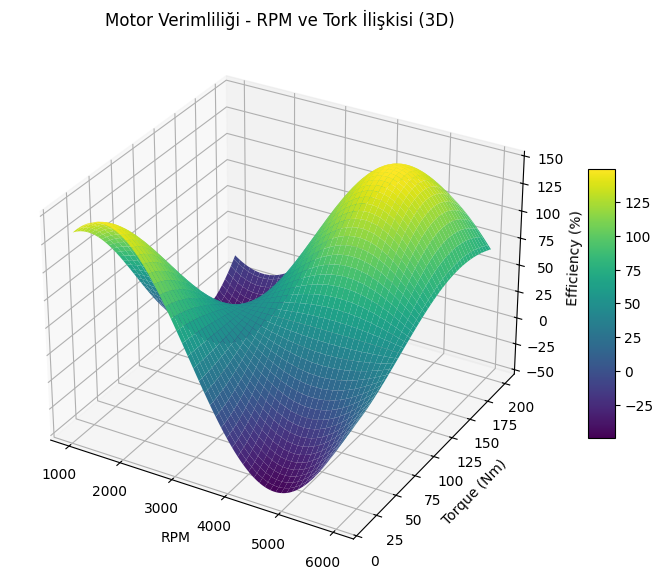

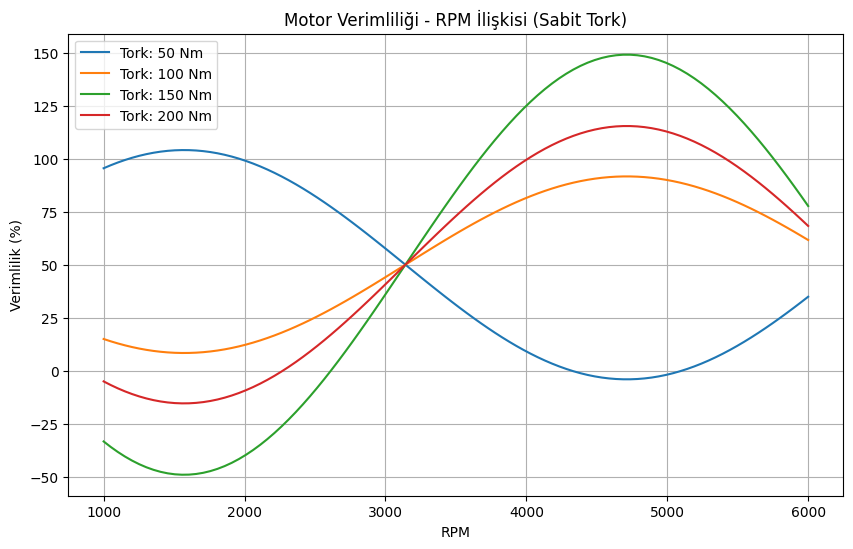

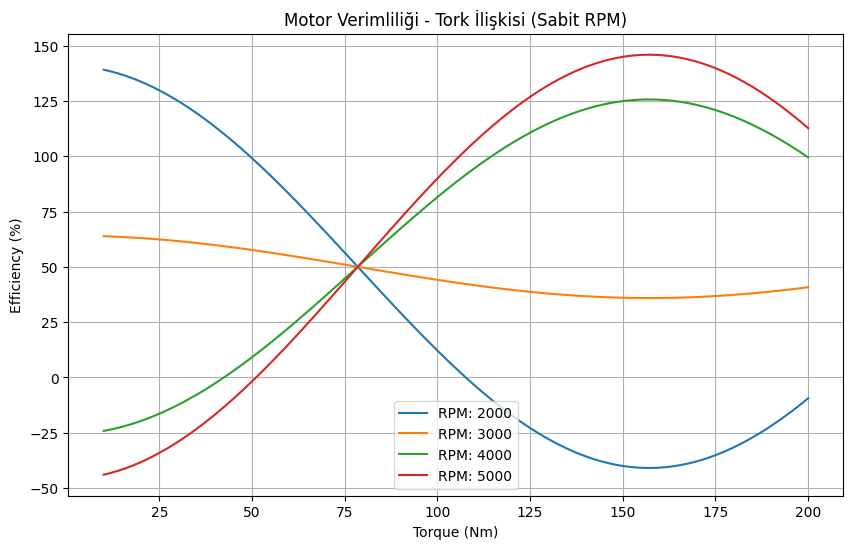

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 1. Verimlilik modeli
def efficiency_model(rpm, torque):
    return (np.sin(rpm / 1000) * np.cos(torque / 50) * 100) + 50

# RPM ve Tork değerlerini tanımlayalım
rpm = np.linspace(1000, 6000, 100)  # Devir sayısı (RPM)
torque = np.linspace(10, 200, 100)  # Tork (Nm)

# Meshgrid oluşturma
RPM, Torque = np.meshgrid(rpm, torque)
efficiency = efficiency_model(RPM, Torque)

# 2. 3D Yüzey Grafiği (Surface Plot)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(RPM, Torque, efficiency, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel('RPM')
ax.set_ylabel('Torque (Nm)')
ax.set_zlabel('Efficiency (%)')
plt.title('Motor Verimliliği - RPM ve Tork İlişkisi (3D)')
plt.show()

# 3. Sabit Tork Seviyelerinde Verimlilik ve RPM İlişkisi
torque_levels = [50, 100, 150, 200]  # Sabit tork seviyeleri
plt.figure(figsize=(10, 6))
for torque_value in torque_levels:
    efficiency_line = efficiency_model(rpm, torque_value)
    plt.plot(rpm, efficiency_line, label=f'Tork: {torque_value} Nm')
plt.title('Motor Verimliliği - RPM İlişkisi (Sabit Tork)')
plt.xlabel('RPM')
plt.ylabel('Verimlilik (%)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Sabit RPM Seviyelerinde Verimlilik ve Tork İlişkisi
rpm_levels = [2000, 3000, 4000, 5000]  # Sabit RPM seviyeleri
plt.figure(figsize=(10, 6))
for rpm_value in rpm_levels:
    efficiency_line = efficiency_model(rpm_value, torque)
    plt.plot(torque, efficiency_line, label=f'RPM: {rpm_value}')
plt.title('Motor Verimliliği - Tork İlişkisi (Sabit RPM)')
plt.xlabel('Torque (Nm)')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)
plt.show()

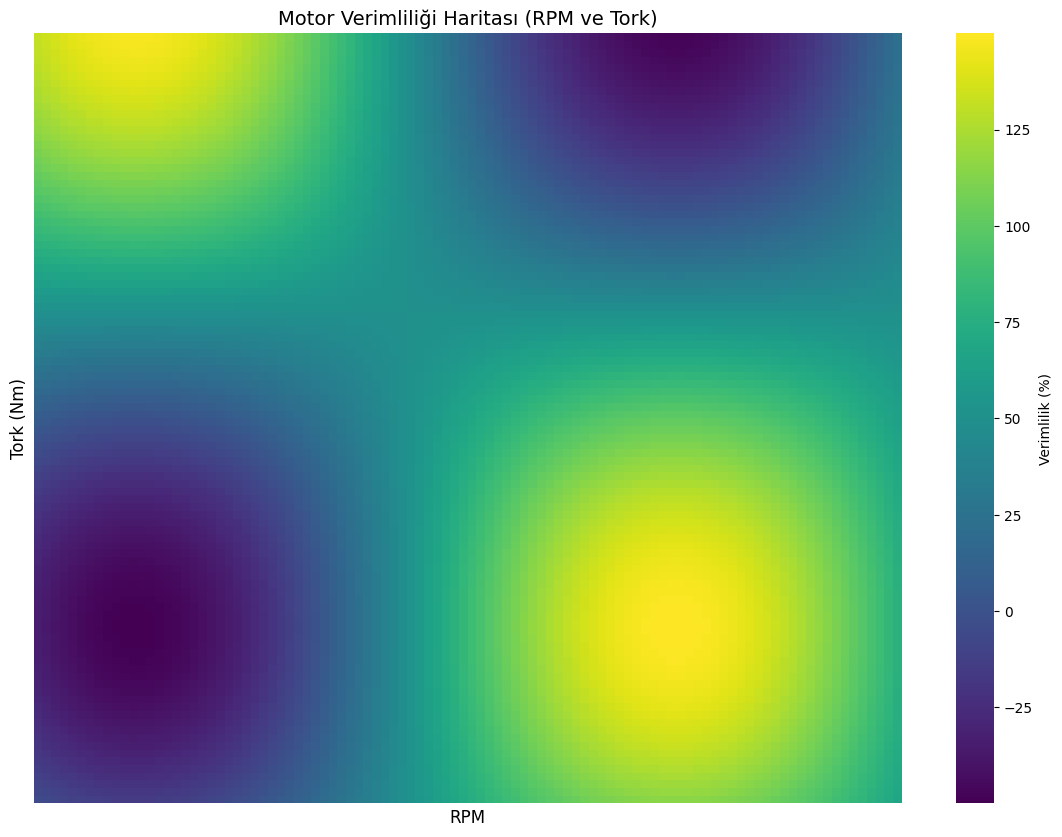

In [15]:
# Grafik boyutunu ayarla
plt.figure(figsize=(14, 10))

# Daha az etiket göster (yazıların çakışmasını önlemek için)
xticks = np.linspace(0, RPM.shape[1] - 1, 4, dtype=int)  # RPM için 4 etiket
yticks = np.linspace(0, Torque.shape[0] - 1, 4, dtype=int)  # Torque için 4 etiket

# Isı haritası çizimi
sns.heatmap(
    efficiency,
    xticklabels=False,  # RPM etiketlerini gizle
    yticklabels=False,  # Torque etiketlerini gizle
    cmap='viridis',
    cbar_kws={'label': 'Verimlilik (%)'}
)

# Yazı boyutunu küçült ve açıları düzenle
plt.xticks(fontsize=8, rotation=45)  # RPM etiketleri için yazı boyutunu küçült ve açı ver
plt.yticks(fontsize=8, rotation=0)   # Torque etiketleri için yazı boyutunu küçült

# Başlık ve eksen etiketlerini ekle
plt.title('Motor Verimliliği Haritası (RPM ve Tork)', fontsize=14)
plt.xlabel('RPM', fontsize=12)
plt.ylabel('Tork (Nm)', fontsize=12)

# Grafiği göster
plt.show()


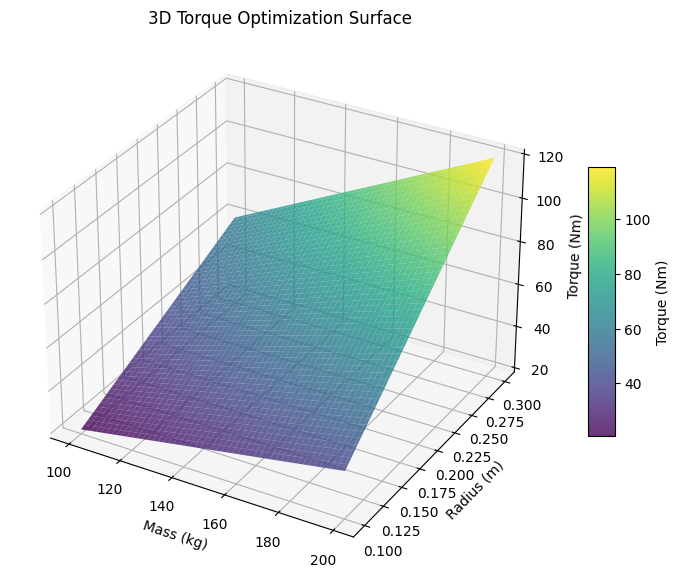

Optimizasyon Sonuçları:
Optimum Kütle: 200.00 kg
Optimum Yarıçap: 0.30 m
Optimum Tork: 120.00 Nm


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Değişkenlerin tanımlanması
mass = np.linspace(100, 200, 100)  # kg
radius = np.linspace(0.1, 0.3, 100)  # m
acceleration = 2.0  # Sabit ivme (m/s^2)

def calculate_torque(mass, radius, acceleration):
    return mass * radius * acceleration

# Meshgrid oluşturma
mass_mesh, radius_mesh = np.meshgrid(mass, radius)
torque_mesh = calculate_torque(mass_mesh, radius_mesh, acceleration)

# 3D Grafik
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(mass_mesh, radius_mesh, torque_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('Mass (kg)')
ax.set_ylabel('Radius (m)')
ax.set_zlabel('Torque (Nm)')
ax.set_title('3D Torque Optimization Surface')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Torque (Nm)')
plt.show()

# Optimizasyon Fonksiyonu
def objective_function(x):
    mass, radius = x
    return -calculate_torque(mass, radius, acceleration)  # Negatif tork (maksimizasyon için)

# Kısıtlamalar ve sınırlar
bounds = [(100, 200), (0.1, 0.3)]  # kütle ve yarıçap sınırları
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - 100},  # kütle > 100
               {'type': 'ineq', 'fun': lambda x: 200 - x[0]},  # kütle < 200
               {'type': 'ineq', 'fun': lambda x: x[1] - 0.1},  # yarıçap > 0.1
               {'type': 'ineq', 'fun': lambda x: 0.3 - x[1]})  # yarıçap < 0.3

# Başlangıç noktası
initial_guess = [150, 0.2]

# Optimizasyon
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints)
opt_mass, opt_radius = result.x
opt_torque = -result.fun

print("Optimizasyon Sonuçları:")
print(f"Optimum Kütle: {opt_mass:.2f} kg")
print(f"Optimum Yarıçap: {opt_radius:.2f} m")
print(f"Optimum Tork: {opt_torque:.2f} Nm")


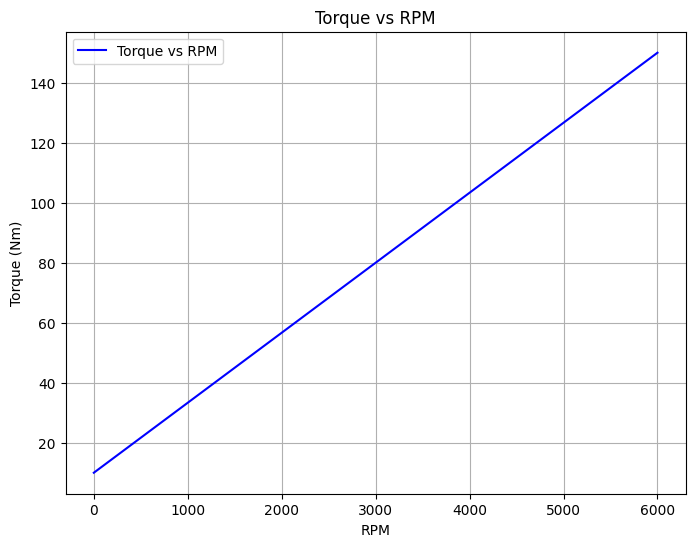

In [18]:
# 2 Boyutlu Grafikler
rpm = np.linspace(0, 6000, 100)
torque = np.linspace(10, 150, 100)
efficiency = np.random.uniform(0, 100, size=(100, 100))  # Örnek verimlilik matrisi

# Tork-RPM Grafiği
plt.figure(figsize=(8, 6))
plt.plot(rpm, torque, label='Torque vs RPM', color='b')
plt.xlabel('RPM')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs RPM')
plt.legend()
plt.grid()
plt.show()

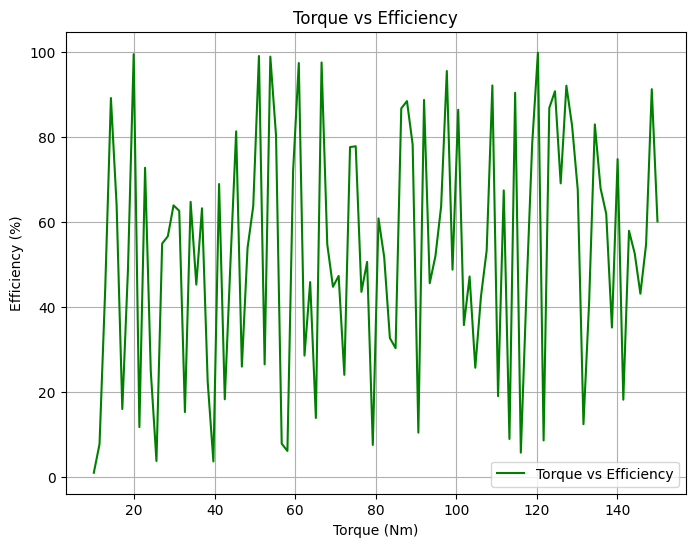

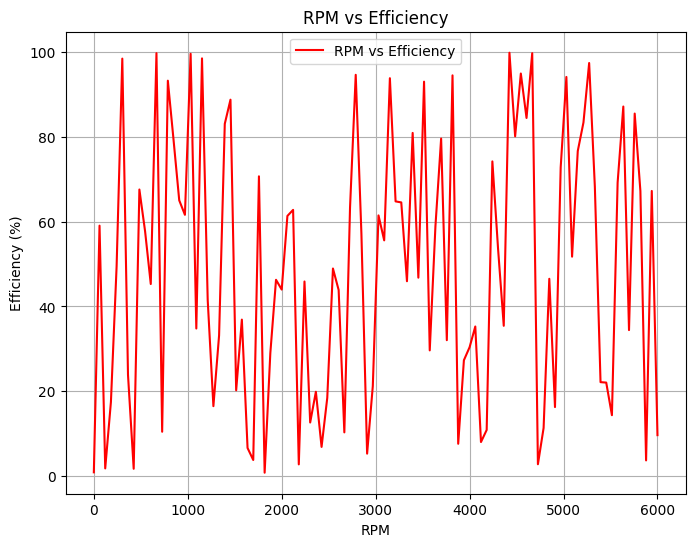

In [19]:
# Tork-Verimlilik Grafiği
plt.figure(figsize=(8, 6))
plt.plot(torque, efficiency[0, :], label='Torque vs Efficiency', color='g')
plt.xlabel('Torque (Nm)')
plt.ylabel('Efficiency (%)')
plt.title('Torque vs Efficiency')
plt.legend()
plt.grid()
plt.show()

# RPM-Verimlilik Grafiği
plt.figure(figsize=(8, 6))
plt.plot(rpm, efficiency[:, 0], label='RPM vs Efficiency', color='r')
plt.xlabel('RPM')
plt.ylabel('Efficiency (%)')
plt.title('RPM vs Efficiency')
plt.legend()
plt.grid()
plt.show()